In [8]:
!pip install pandas_ta
import pandas_ta as ta
import pandas as pd

!pip install scikit-optimize

!pip install tpot

data = pd.read_csv('/content/Total_APT_for_Target_Features.csv', encoding='utf-8')

data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=eaa6a80d34e30bf2bb4d4fec8e538f57f058831f36638540f5d276a1eb887e36
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


,Sell_Price,Sell_Count,JS_Price,JS_Count,CR,UR,LC_index,CA_index,TC_index,SDT_index,IR,Crime_Rates,Total_Pop,Univ_Counts,Park_Counts,School_Counts,Subway_Counts
0,82549.28,133,38076.56,750,46.13,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,554870,1.0,7,77,21
1,44177.42,116,21442.84,490,48.54,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,484742,0.0,7,60,14
2,28957.76,58,18593.14,217,64.21,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,338041,1.0,4,34,3
3,29813.92,96,19282.70,548,64.68,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,561431,2.0,9,80,9
4,27317.47,99,21386.54,260,78.29,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,517095,1.0,2,55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,132585.00,30,73065.05,261,55.11,2.1,109.0,109.0,110.3,87.677816,2.5,0.865139,215891,2.0,2,34,10
3046,54418.49,119,40223.93,453,73.92,2.1,109.0,109.0,110.3,87.677816,2.5,0.865139,465727,1.0,7,66,13
3047,23635.22,23,50643.70,64,214.27,2.1,109.0,109.0,110.3,87.677816,2.5,0.865139,140477,6.0,12,36,15
3048,99441.18,34,56290.27,135,56.61,2.1,109.0,109.0,110.3,87.677816,2.5,0.865139,119206,2.0,4,31,23


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras

# Load dataset from CSV file using pandas read_csv()
data = pd.read_csv('/content/Total_APT_for_Target_Features.csv', encoding='utf-8')

# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Random Forest Model (using scikit-learn)
rf_model = RandomForestRegressor(n_estimators=10000, random_state=1000)
rf_model.fit(X_train.values, y_train)
y_pred_rf_model = rf_model.predict(X_test.values)

rmse_rf_model = np.sqrt(mean_squared_error(y_test, y_pred_rf_model))
mape_rf_model = np.mean(np.abs((y_test - y_pred_rf_model) / y_test)) * 100

print("Random Forest Model - RMSE:", rmse_rf_model)
print("Random Forest Model - MAPE:", mape_rf_model)


Random Forest Model - RMSE: 1365.8906561927429
Random Forest Model - MAPE: 1.0846211748420855


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load your training dataset (replace 'your_training_data.csv' with the actual file path)
training_data = pd.read_csv('/content/Total_APT_for_Target_Features.csv', encoding='utf-8')

# Define X (features) and y (target variable) from the training data
X_train = training_data.drop(columns=['JS_Price'])
y_train = training_data['JS_Price']

# Create and train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=100)
rf_model.fit(X_train, y_train)

# Save the trained model to a file (replace 'your_model_file_path.pkl' with your desired file path)
model_file_path = 'your_model_file_path.pkl'
joblib.dump(rf_model, model_file_path)


['your_model_file_path.pkl']

In [3]:
model_file_path = 'your_model_file_path.pkl'
rf_model = joblib.load(model_file_path)

# Continue with making predictions using rf_model.predict() as before


In [4]:
import pandas as pd
import numpy as np
import joblib

# Specify the file path to load the trained model
model_file_path = 'your_model_file_path.pkl'

# Load your trained Random Forest Model from the specified file
rf_model = joblib.load(model_file_path)

# Prepare the input features for the specific future date (replace values with your specific data)
future_data = pd.DataFrame({
    'Sell_Price': [70569.85],
    'Sell_Count': [200],
    'JS_Count': [192],
    'CR': [73.22],
    'UR': [3.1],
    'LC_index': [93],
    'CA_index': [97.4],
    'TC_index': [93],
    'SDT_index': [102.5154457],
    'IR': [1.5],
    'Crime_Rates': [1.247925049],
    'Total_Pop': [351919],
    'Univ_Counts': [3],
    'Park_Counts': [2],
    'School_Counts': [42],
    'Subway_Counts': [11]
})

# Use the trained Random Forest Model to make predictions for the specific future date
predicted_price = rf_model.predict(future_data.values)

# Print the predicted JS_Price for the specific future date
print("Predicted JS_Price for the Future Date:", predicted_price[0])


Predicted JS_Price for the Future Date: 51635.31430000081


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


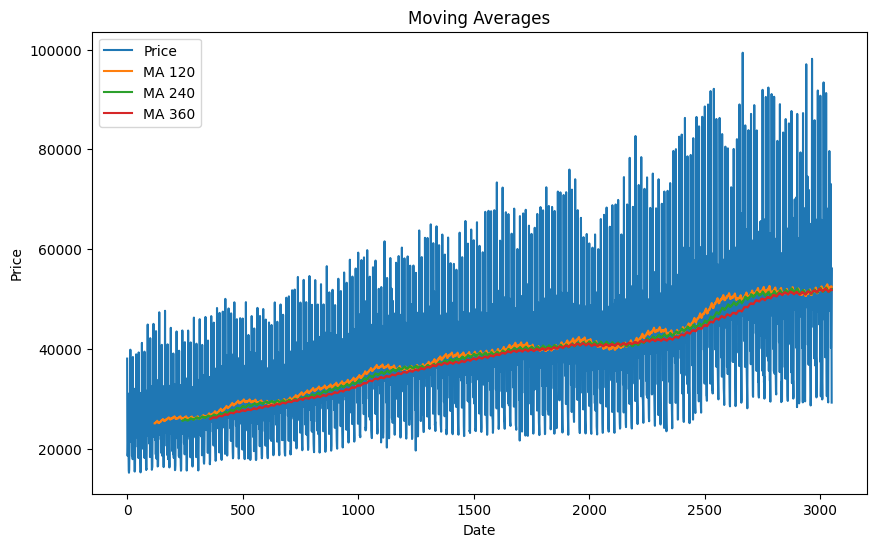

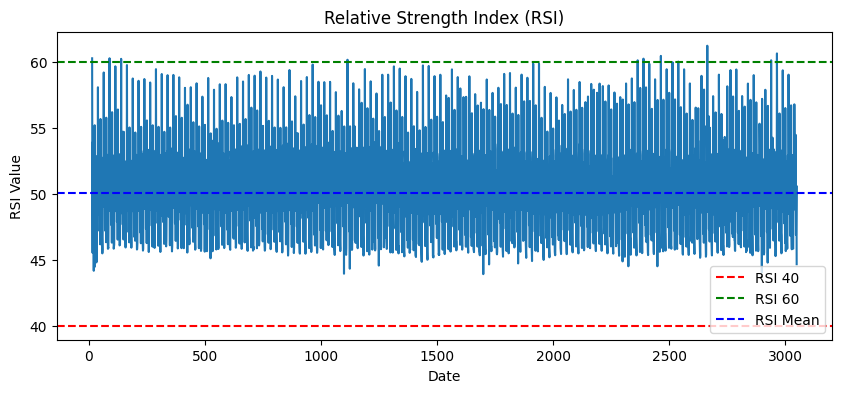

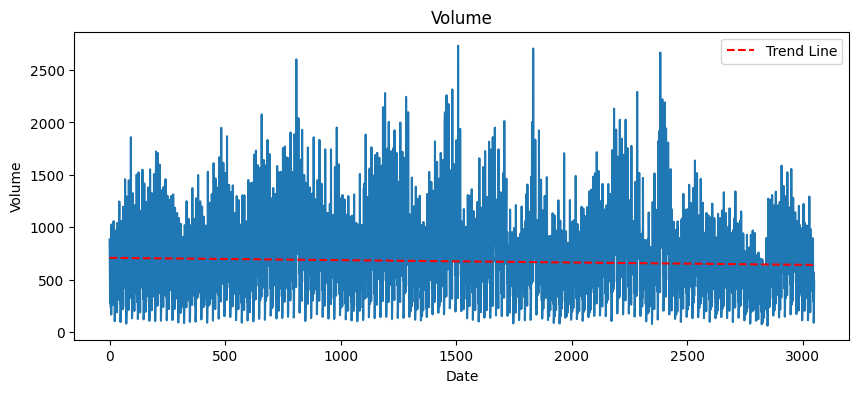

Linear Regression Model - RMSE: 3153.064336768714
Linear Regression Model - MAPE: 6.199929224547063
Epoch 1/50
61/61 [==============================] - 3s 22ms/step - loss: 328599744.0000 - val_loss: 52371844.0000
Epoch 2/50
61/61 [==============================] - 1s 14ms/step - loss: 61411460.0000 - val_loss: 50541152.0000
Epoch 3/50
61/61 [==============================] - 0s 8ms/step - loss: 57448072.0000 - val_loss: 46524020.0000
Epoch 4/50
61/61 [==============================] - 1s 9ms/step - loss: 57530148.0000 - val_loss: 45057896.0000
Epoch 5/50
61/61 [==============================] - 0s 8ms/step - loss: 56784536.0000 - val_loss: 52384240.0000
Epoch 6/50
61/61 [==============================] - 0s 6ms/step - loss: 56145252.0000 - val_loss: 44847180.0000
Epoch 7/50
61/61 [==============================] - 0s 7ms/step - loss: 55600664.0000 - val_loss: 44899404.0000
Epoch 8/50
61/61 [==============================] - 0s 5ms/step - loss: 54979784.0000 - val_loss: 48859216.0000
E

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:816.28144
[200]	validation_0-rmse:716.59029
[300]	validation_0-rmse:701.73409
[400]	validation_0-rmse:693.44281
[500]	validation_0-rmse:688.97037
[600]	validation_0-rmse:686.33776
[700]	validation_0-rmse:683.87276
[800]	validation_0-rmse:682.38093
[900]	validation_0-rmse:681.71512
[999]	validation_0-rmse:680.94126
XGBoost Model - RMSE: 680.9413586589537
XGBoost Model - MAPE: 0.8640778282778097
Random Forest Model - RMSE: 843.7541991656364
Random Forest Model - MAPE: 0.8951184045709237


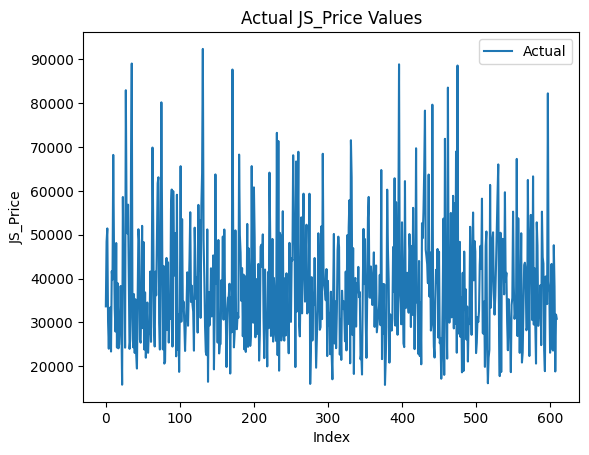

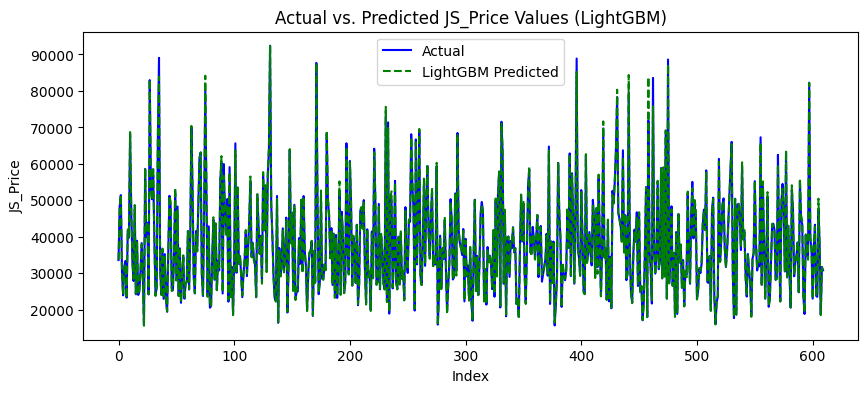

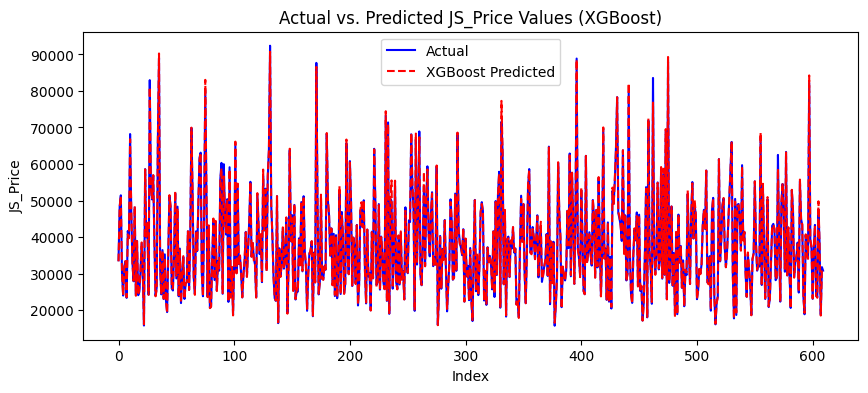

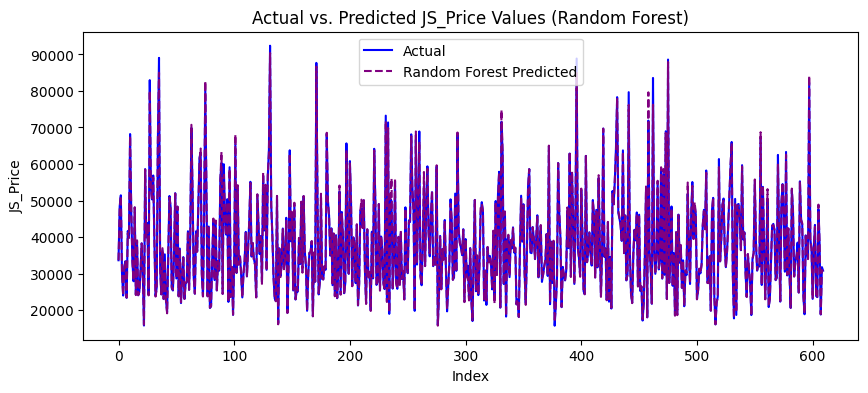

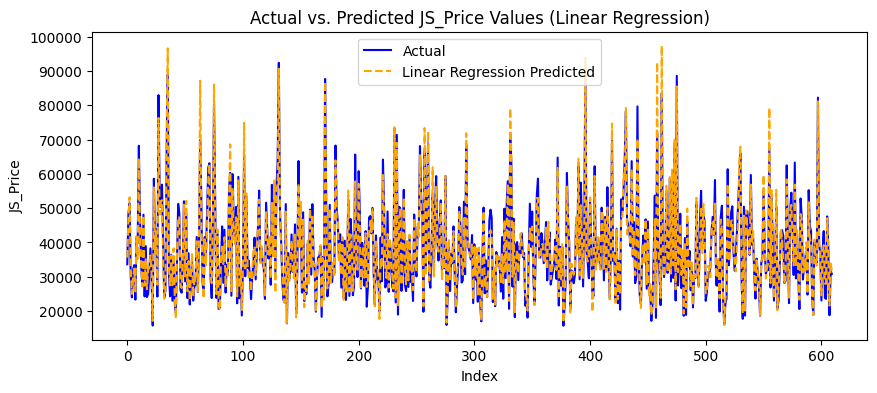

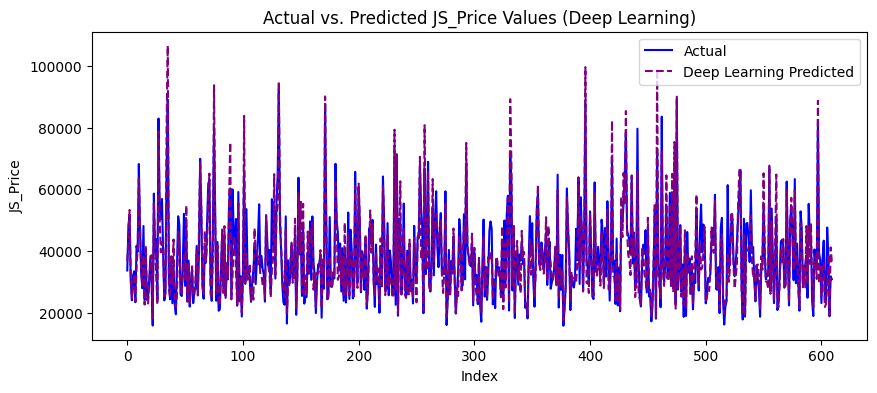

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
!pip install lightgbm
!pip install xgboost
import lightgbm as lgb
import xgboost as xgb

# Load your dataset (replace '/content/Total_APT_for_Target_Features.csv' with your dataset path)
data = pd.read_csv('/content/Total_APT_for_Target_Features.csv', encoding='utf-8')


# Calculate Moving Averages (MA) indicators
data['ma_120'] = ta.sma(data['JS_Price'], length=120)
data['ma_240'] = ta.sma(data['JS_Price'], length=240)
data['ma_360'] = ta.sma(data['JS_Price'], length=360)



# Calculate Relative Strength Index (RSI) indicator
data['rsi_14'] = ta.rsi(data['JS_Price'], length=14)



data['volume'] = data['JS_Count'] + data['Sell_Count']





# Plotting Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(data['JS_Price'], label='Price')
plt.plot(data['ma_120'], label='MA 120')
plt.plot(data['ma_240'], label='MA 240')
plt.plot(data['ma_360'], label='MA 360')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting Relative Strength Index (RSI)
plt.figure(figsize=(10, 4))
plt.plot(data['rsi_14'])
plt.axhline(y=40, color='r', linestyle='--', label='RSI 40')
plt.axhline(y=60, color='g', linestyle='--', label='RSI 60')
plt.axhline(y=data['rsi_14'].mean(), color='b', linestyle='--', label='RSI Mean')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()


# Plotting Volume
plt.figure(figsize=(10, 4))
plt.plot(data['volume'])
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')

# Adding a trend line using linear regression
from sklearn.linear_model import LinearRegression

# Create a linear regression model
volume_data = data['volume'].values.reshape(-1, 1)
date_index = np.arange(len(data))

lr_model = LinearRegression()
lr_model.fit(date_index.reshape(-1, 1), volume_data)
trend_line = lr_model.predict(date_index.reshape(-1, 1))

# Plot the trend line
plt.plot(date_index, trend_line, label='Trend Line', linestyle='--', color='red')
plt.legend()
plt.show()







# Fill NaN with suitable values using RF
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load your dataset
data = pd.read_csv('/content/Total_APT_for_Target_Features.csv', encoding='utf-8')

# Define a function to impute missing values for a specific column using RF
def impute_missing_with_rf(data, column_name):
    # Split data into two parts: rows with and without missing values for the specified column
    data_with_missing = data[data[column_name].isna()]
    data_without_missing = data[~data[column_name].isna()]

    # Separate features and target variable
    X_train = data_without_missing.drop(columns=[column_name])
    y_train = data_without_missing[column_name]

    # Train a Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=500, random_state=84)
    rf_regressor.fit(X_train, y_train)

    # Predict missing values
    X_missing = data_with_missing.drop(columns=[column_name])
    predicted_missing_values = rf_regressor.predict(X_missing)

    # Impute missing values with predictions
    data_with_missing[column_name] = predicted_missing_values

    # Combine the imputed data with the original data
    data = pd.concat([data_with_missing, data_without_missing])

    return data

# Iterate through columns and impute missing values with RF
for column_name in data.columns:
    if data[column_name].isna().any():
        data = impute_missing_with_rf(data, column_name)






# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']





# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




# Linear Regression Model (using scikit-learn)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train.values, y_train)
y_pred_linear_regression_model = linear_regression_model.predict(X_test.values)

rmse_linear_regression_model = np.sqrt(mean_squared_error(y_test, y_pred_linear_regression_model))
mape_linear_regression_model = np.mean(np.abs((y_test - y_pred_linear_regression_model) / y_test)) * 100

print("Linear Regression Model - RMSE:", rmse_linear_regression_model)
print("Linear Regression Model - MAPE:", mape_linear_regression_model)




# Deep Learning Model FNN
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single unit for regression task
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train.values, y_train.values, epochs=50, validation_split=0.2)

y_pred_deep_learning_model = model.predict(X_test.values)
rmse_deep_learning_model = np.sqrt(mean_squared_error(y_test, y_pred_deep_learning_model))
mape_deep_learning_model = np.mean(np.abs((y_test - y_pred_deep_learning_model.flatten()) / y_test)) * 100

print("Deep Learning Model - RMSE:", rmse_deep_learning_model)
print("Deep Learning Model - MAPE:", mape_deep_learning_model)





# Train and evaluate LightGBM model with manual early stopping
lgb_train_data = lgb.Dataset(X_train.values, label=y_train.values)
lgb_test_data = lgb.Dataset(X_test.values, label=y_test.values, reference=lgb_train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

lgb_model = lgb.train(params, lgb_train_data, valid_sets=[lgb_train_data, lgb_test_data], num_boost_round=1000)

# Find the best iteration based on the minimum validation error
best_iteration = np.argmin(lgb_model.best_score['valid_1']['rmse'])

# Predict using LightGBM model at the best iteration
y_pred_lgb = lgb_model.predict(X_test.values, num_iteration=best_iteration)

# Calculate RMSE and MAPE for LightGBM
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mape_lgb = np.mean(np.abs((y_test - y_pred_lgb) / y_test)) * 100

print("LightGBM Model - RMSE:", rmse_lgb)
print("LightGBM Model - MAPE:", mape_lgb)



# Train and evaluate XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

xgb_model.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)], early_stopping_rounds=50, verbose=100)

# Predict using XGBoost model
y_pred_xgb = xgb_model.predict(X_test.values)

# Calculate RMSE and MAPE for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

print("XGBoost Model - RMSE:", rmse_xgb)
print("XGBoost Model - MAPE:", mape_xgb)





# Random Forest Model (using scikit-learn)
rf_model = RandomForestRegressor(n_estimators=5000, random_state=500)
rf_model.fit(X_train.values, y_train)
y_pred_rf_model = rf_model.predict(X_test.values)

rmse_rf_model = np.sqrt(mean_squared_error(y_test, y_pred_rf_model))
mape_rf_model = np.mean(np.abs((y_test - y_pred_rf_model) / y_test)) * 100

print("Random Forest Model - RMSE:", rmse_rf_model)
print("Random Forest Model - MAPE:", mape_rf_model)




# Plot actual JS_Price values
plt.plot(y_test.values, label='Actual')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual JS_Price Values')
plt.legend()
plt.show()

# Plot actual vs. predicted values for LightGBM
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_lgb, label='LightGBM Predicted', linestyle='--', color='green')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual vs. Predicted JS_Price Values (LightGBM)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for XGBoost
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_xgb, label='XGBoost Predicted', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual vs. Predicted JS_Price Values (XGBoost)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_rf_model, label='Random Forest Predicted', linestyle='--', color='purple')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual vs. Predicted JS_Price Values (Random Forest)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_linear_regression_model, label='Linear Regression Predicted', linestyle='--', color='orange')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual vs. Predicted JS_Price Values (Linear Regression)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for Deep Learning
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_deep_learning_model, label='Deep Learning Predicted', linestyle='--', color='purple')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual vs. Predicted JS_Price Values (Deep Learning)')
plt.legend()
plt.show()


### Tuning - Manually - LightGBM

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate LightGBM model with manual early stopping
lgb_train_data = lgb.Dataset(X_train.values, label=y_train.values)
lgb_test_data = lgb.Dataset(X_test.values, label=y_test.values, reference=lgb_train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 9,
    'learning_rate': 0.16223235,
    'feature_fraction': 1
}


lgb_model = lgb.train(params, lgb_train_data, valid_sets=[lgb_train_data, lgb_test_data], num_boost_round=1000)

# Find the best iteration based on the minimum validation error
best_iteration = np.argmin(lgb_model.best_score['valid_1']['rmse'])

# Predict using LightGBM model at the best iteration
y_pred_lgb = lgb_model.predict(X_test.values, num_iteration=best_iteration)

# Calculate RMSE and MAPE for LightGBM
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mape_lgb = np.mean(np.abs((y_test - y_pred_lgb) / y_test)) * 100

print("LightGBM Model - RMSE:", rmse_lgb)
print("LightGBM Model - MAPE:", mape_lgb)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 2440, number of used features: 16
[LightGBM] [Info] Start training from score 38842.595787
LightGBM Model - RMSE: 808.5239110929743
LightGBM Model - MAPE: 1.2936493730096006


### Tuning: Gradient-Based Optimization - LightGBM

In [5]:
from skopt import gp_minimize
from skopt.space import Real
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split

def objective(params):
    num_leaves, learning_rate, feature_fraction = params

    # Create a LightGBM dataset
    lgb_train_data = lgb.Dataset(X_train, label=y_train)
    lgb_test_data = lgb.Dataset(X_test, label=y_test, reference=lgb_train_data)

    # Define LightGBM parameters
    lgb_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': int(num_leaves),
        'learning_rate': learning_rate,
         'feature_fraction': feature_fraction
    }

    # Train the LightGBM model
    lgb_model = lgb.train(lgb_params, lgb_train_data, valid_sets=[lgb_train_data, lgb_test_data], num_boost_round=1000)

    # Predict using the trained model
    y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

    # Return the negative RMSE as skopt minimizes the objective function
    return -rmse
space = [
    Real(2, 50, name='num_leaves'),
    Real(0.01, 0.5, name='learning_rate'),
        Real(0.1, 1.0, name='feature_fraction')
]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
result = gp_minimize(objective, space, n_calls=20, random_state=0)
best_hyperparameters = result.x
best_rmse = -result.fun

print("Best Hyperparameters:", best_hyperparameters)
print("Best RMSE:", best_rmse)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 2440, number of used features: 16
[LightGBM] [Info] Start training from score 38842.595787
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 2440, number of used features: 16
[LightGBM] [Info] Start training from score 38842.595787
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 2440, number of used features: 16
[LightGBM] [I

### Tuning: Randomized Search CV - LightGBM

In [6]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions to sample from randomly
param_dist = {
    'num_leaves': randint(2, 50),  # Adjust the range as needed
    'learning_rate': uniform(0.01, 0.5),  # Adjust the range as needed
    'feature_fraction': uniform(0.1, 1.0)  # Adjust the range as needed
}

# Create a LightGBM regressor
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt', verbose=-1)

# Create the RandomizedSearchCV object with a predefined number of iterations (e.g., n_iter=10)
random_search = RandomizedSearchCV(lgb_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=2)

# Fit the random search to your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model performance from random search results
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Note the negative sign to convert from neg_mean_squared_error to RMSE

print("Best Score (RMSE):", best_score)
print("Best Hyperparameters:", best_params)

# Train a LightGBM model with the best hyperparameters
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = final_model.predict(X_test)

# Calculate RMSE and MAPE for LightGBM
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mape_lgb = np.mean(np.abs((y_test - y_pred_lgb) / y_test)) * 100

print("Best LightGBM Model - RMSE:", rmse_lgb)
print("Best LightGBM Model - MAPE:", mape_lgb)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END feature_fraction=0.8979308572441373, learning_rate=0.354667778204399, num_leaves=43; total time=   0.2s
[CV] END feature_fraction=0.8979308572441373, learning_rate=0.354667778204399, num_leaves=43; total time=   0.3s
[CV] END feature_fraction=0.8979308572441373, learning_rate=0.354667778204399, num_leaves=43; total time=   0.3s
[CV] END feature_fraction=0.9835296170773734, learning_rate=0.39445818729427606, num_leaves=4; total time=   0.1s
[CV] END feature_fraction=0.9835296170773734, learning_rate=0.39445818729427606, num_leaves=4; total time=   0.1s
[CV] END feature_fraction=0.9835296170773734, learning_rate=0.39445818729427606, num_leaves=4; total time=   0.1s
[CV] END feature_fraction=1.0285841149221566, learning_rate=0.0484371333070489, num_leaves=32; total time=   0.0s
[CV] END feature_fraction=1.0285841149221566, learning_rate=0.0484371333070489, num_leaves=32; total time=   0.0s
[CV] END feature_fraction=1.02

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1049, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 245, in train
    booster

### Tuning: TPOT - LightGBM

In [9]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error
from tpot import TPOTRegressor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distributions to sample from randomly
param_dist = {
    'num_leaves': randint(2, 50),  # Adjust the range as needed
    'learning_rate': uniform(0.01, 0.5),  # Adjust the range as needed
    'feature_fraction': uniform(0.1, 1.0)  # Adjust the range as needed
}

# Create a LightGBM regressor
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt', verbose=-1)

# Create the RandomizedSearchCV object with a predefined number of iterations (e.g., n_iter=10)
random_search = RandomizedSearchCV(lgb_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=2)

# Fit the random search to your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model performance from random search results
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Note the negative sign to convert from neg_mean_squared_error to RMSE

print("Best Score (RMSE) from RandomizedSearchCV:", best_score)
print("Best Hyperparameters from RandomizedSearchCV:", best_params)

# Train a LightGBM model with the best hyperparameters
final_lgb_model = lgb.LGBMRegressor(**best_params)
final_lgb_model.fit(X_train, y_train)

# Make predictions on the test set using the tuned LightGBM model
y_pred_lgb = final_lgb_model.predict(X_test)

# Calculate RMSE for LightGBM
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print("Best LightGBM Model - RMSE:", rmse_lgb)

# Create and fit the TPOT regressor using genetic algorithms for hyperparameter optimization
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)

# Get the best pipeline (model) found by TPOT and its performance on the test data
best_pipeline = tpot.fitted_pipeline_
best_score_tpot = tpot.score(X_test, y_test)

print("Best Score from TPOT:", best_score_tpot)
print("Best Pipeline from TPOT:", best_pipeline)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END feature_fraction=0.1298629457678421, learning_rate=0.4999056801571286, num_leaves=30; total time=   0.4s
[CV] END feature_fraction=0.1298629457678421, learning_rate=0.4999056801571286, num_leaves=30; total time=   0.4s
[CV] END feature_fraction=0.1298629457678421, learning_rate=0.4999056801571286, num_leaves=30; total time=   0.4s
[CV] END feature_fraction=0.9855941421572811, learning_rate=0.37274646145020707, num_leaves=48; total time=   1.1s
[CV] END feature_fraction=0.9855941421572811, learning_rate=0.37274646145020707, num_leaves=48; total time=   1.1s
[CV] END feature_fraction=0.9855941421572811, learning_rate=0.37274646145020707, num_leaves=48; total time=   0.5s
[CV] END feature_fraction=0.902211304236742, learning_rate=0.4324465455920104, num_leaves=26; total time=   0.3s
[CV] END feature_fraction=0.902211304236742, learning_rate=0.4324465455920104, num_leaves=26; total time=   0.3s
[CV] END feature_fraction=

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2008529.454741853

Generation 2 - Current best internal CV score: -1218726.415532947

Generation 3 - Current best internal CV score: -1155107.5597151716

Generation 4 - Current best internal CV score: -1155107.5597151716

Generation 5 - Current best internal CV score: -1155107.5597151716

Generation 6 - Current best internal CV score: -1150718.5855058671

Generation 7 - Current best internal CV score: -1150718.5855058671

Generation 8 - Current best internal CV score: -1111282.1383136786

Generation 9 - Current best internal CV score: -1037899.3546139516

Generation 10 - Current best internal CV score: -1034050.268339655

Best pipeline: XGBRegressor(MinMaxScaler(input_matrix), learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.7000000000000001, verbosity=0)
Best Score from TPOT: -603331.2360860618
Best Pipeline from TPOT: Pipeline(steps=[('minmaxscaler', MinMaxScaler())

### Tuning: TOPT - LightGBM

In [16]:
# Get predictions from the best TPOT pipeline
y_pred_tpot = tpot.predict(X_test)

# Calculate RMSE for TPOT
rmse_tpot = np.sqrt(mean_squared_error(y_test, y_pred_tpot))

# Calculate MAPE for TPOT
mape_tpot = np.mean(np.abs((y_test - y_pred_tpot) / y_test)) * 100

print("TPOT Model - RMSE:", rmse_tpot)
print("TPOT Model - MAPE:", mape_tpot)

TPOT Model - RMSE: 776.7439964918054
TPOT Model - MAPE: 1.0727200373820978


### Algorithm - DL - LSTM

Epoch 1/500
77/77 [==============================] - 5s 13ms/step - loss: 1714556160.0000 - val_loss: 1692011520.0000
Epoch 2/500
77/77 [==============================] - 0s 6ms/step - loss: 1651355264.0000 - val_loss: 1485628928.0000
Epoch 3/500
77/77 [==============================] - 0s 6ms/step - loss: 1073309696.0000 - val_loss: 502050944.0000
Epoch 4/500
77/77 [==============================] - 1s 7ms/step - loss: 235741152.0000 - val_loss: 121228368.0000
Epoch 5/500
77/77 [==============================] - 0s 6ms/step - loss: 137942672.0000 - val_loss: 112876792.0000
Epoch 6/500
77/77 [==============================] - 0s 6ms/step - loss: 128142216.0000 - val_loss: 105246656.0000
Epoch 7/500
77/77 [==============================] - 1s 11ms/step - loss: 119328352.0000 - val_loss: 97893216.0000
Epoch 8/500
77/77 [==============================] - 1s 15ms/step - loss: 110718872.0000 - val_loss: 91810280.0000
Epoch 9/500
77/77 [==============================] - 1s 13ms/step - loss: 

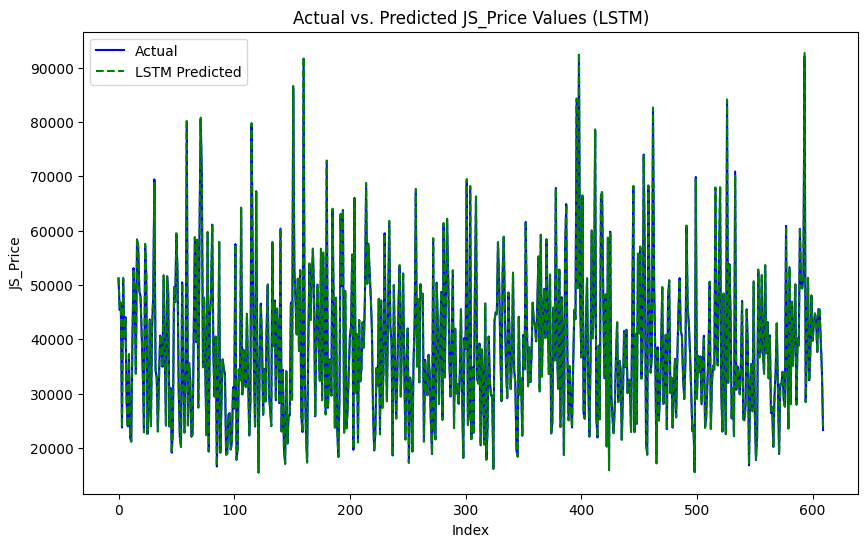

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras


# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model_lstm = keras.Sequential([
    keras.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    keras.layers.LSTM(50, activation='relu', return_sequences=True),
    keras.layers.LSTM(50, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='mse')

# Train the LSTM model
history = model_lstm.fit(X_train_lstm, y_train, epochs=500, verbose=1, validation_data=(X_test_lstm, y_test))

# Make predictions using the LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Calculate RMSE for LSTM
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
print("LSTM RMSE:", rmse_lstm)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_lstm, label='LSTM Predicted', linestyle='--', color='green')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual vs. Predicted JS_Price Values (LSTM)')
plt.legend()
plt.show()


### Algorithm - DL - FNN

In [15]:
# Deep Learning Model FNN
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single unit for regression task
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train.values, y_train.values, epochs=500, validation_split=0.2)

y_pred_deep_learning_model = model.predict(X_test.values)
rmse_deep_learning_model = np.sqrt(mean_squared_error(y_test, y_pred_deep_learning_model))
mape_deep_learning_model = np.mean(np.abs((y_test - y_pred_deep_learning_model.flatten()) / y_test)) * 100

print("Deep Learning Model - RMSE:", rmse_deep_learning_model)
print("Deep Learning Model - MAPE:", mape_deep_learning_model)

Epoch 1/500
61/61 [==============================] - 4s 20ms/step - loss: 445011552.0000 - val_loss: 77248056.0000
Epoch 2/500
61/61 [==============================] - 1s 9ms/step - loss: 58311920.0000 - val_loss: 57768432.0000
Epoch 3/500
61/61 [==============================] - 1s 11ms/step - loss: 55090676.0000 - val_loss: 55817824.0000
Epoch 4/500
61/61 [==============================] - 0s 7ms/step - loss: 54702824.0000 - val_loss: 56081252.0000
Epoch 5/500
61/61 [==============================] - 0s 8ms/step - loss: 54760048.0000 - val_loss: 56691796.0000
Epoch 6/500
61/61 [==============================] - 0s 3ms/step - loss: 53604136.0000 - val_loss: 57237032.0000
Epoch 7/500
61/61 [==============================] - 1s 8ms/step - loss: 54112072.0000 - val_loss: 55941136.0000
Epoch 8/500
61/61 [==============================] - 0s 6ms/step - loss: 53346896.0000 - val_loss: 54054716.0000
Epoch 9/500
61/61 [==============================] - 0s 6ms/step - loss: 52214336.0000 - val_

### Algorithm - Statistics - ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

ARIMA RMSE: 14033.42419977813


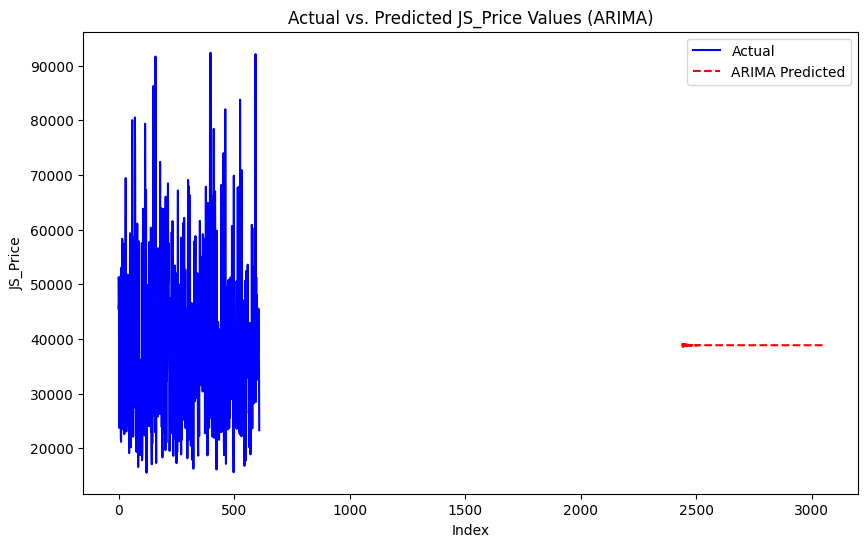

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the ARIMA model
p = 5  # Autoregressive (AR) order
d = 1  # Integrated (I) order
q = 2  # Moving Average (MA) order

model_arima = ARIMA(y_train, order=(p, d, q))
model_arima_fit = model_arima.fit()

# Make predictions using the ARIMA model
y_pred_arima = model_arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
print("ARIMA RMSE:", rmse_arima)

# Plot actual vs. predicted values for ARIMA
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_arima, label='ARIMA Predicted', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual vs. Predicted JS_Price Values (ARIMA)')
plt.legend()
plt.show()


### Tuning: ARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# Load your dataset here
# Replace 'data' with your dataset

# Perform any necessary data preprocessing, such as handling missing values and outliers
# Ensure that your dataset has a timestamp/index for time series analysis

# Split the dataset into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Check and enhance stationarity if needed (differencing)
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# Define a function to evaluate ARIMA models with different orders
def evaluate_arima_model(train_data, test_data, order):
    history = [x for x in train_data]
    predictions = []
    for t in range(len(test_data)):
        model = ARIMA(history, order=order)
        try:
            model_fit = model.fit()
        except:
            continue
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test_data[t])
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    return rmse, predictions

# Grid search for ARIMA hyperparameters (p, d, q)
best_rmse = float('inf')
best_order = None
for p in range(5):  # Expand the range for p
    for d in range(2):  # Expand the range for d
        for q in range(5):  # Expand the range for q
            order = (p, d, q)
            try:
                # Check stationarity and apply differencing if needed
                if d > 0:
                    train_diff = difference(train['JS_Price'].values, d)
                else:
                    train_diff = train['JS_Price'].values
                rmse, predictions = evaluate_arima_model(train_diff, test['JS_Price'].values, order)
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = order
            except:
                continue

print("Best ARIMA Order (p, d, q):", best_order)
print("Best ARIMA RMSE:", best_rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWar